In [17]:
%matplotlib inline
#format the book
import book_format
import kf_book.book_plots as book_plots
from kf_book.book_plots import figsize, set_figsize
import matplotlib.pyplot as plt

book_format.set_style()

In [18]:
import numpy as np
belief = np.array([1/10]*10)
print(belief)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [19]:
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [20]:
belief = np.array([1/3, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0])
print(len(belief))

10


In [21]:
belief = hallway * (1/3)
print(belief)

[0.333 0.333 0.    0.    0.    0.    0.    0.    0.333 0.   ]


0.8
[0.0, 0.0, 0.0, 0.0, 0.1, 0.8, 0.1, 0.0, 0.0, 0.0]


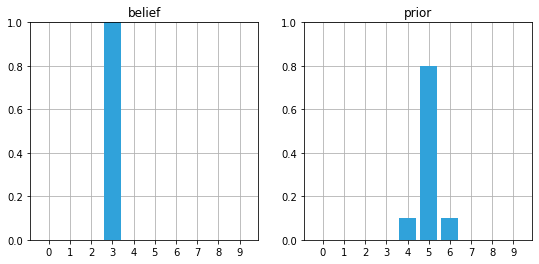

In [34]:
def predict(belief, move, p_under, p_correct, p_over):
    n = len(belief)
    prior =[]
    print(p_correct)
    for i in range(n):
        x = \
            belief[(i-move)%n] * p_correct +\
            belief[(i-move-1)%n] * p_under +\
            belief[(i-move+1)%n] * p_over

        prior.append(x)
    return prior

belief = [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
prior = predict(belief, 2, .1, .8, .1)
print(prior)
book_plots.plot_belief_vs_prior(belief, prior)

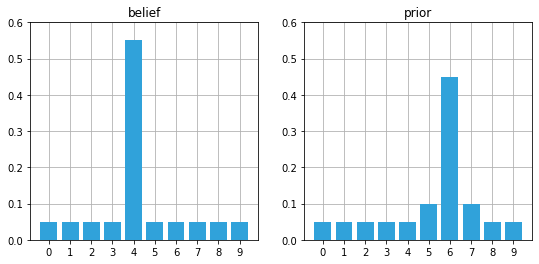

In [36]:
from filterpy.discrete_bayes import predict

belief = [.05, .05, .05, .05, .55, .05, .05, .05, .05, .05]
prior = predict(belief, offset=2, kernel=[.1, .8, .1])
book_plots.plot_belief_vs_prior(belief, prior, ylim=(0,0.6))

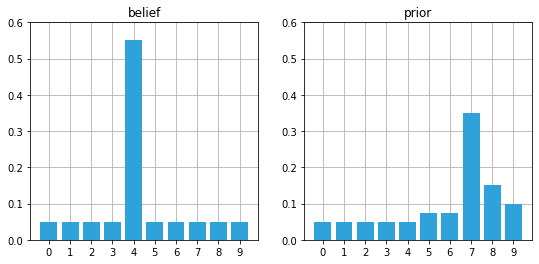

In [43]:
prior = predict(belief, offset=3, kernel=[.05, .05, .6, .2, .1])
book_plots.plot_belief_vs_prior(belief, prior, ylim=(0,0.6))

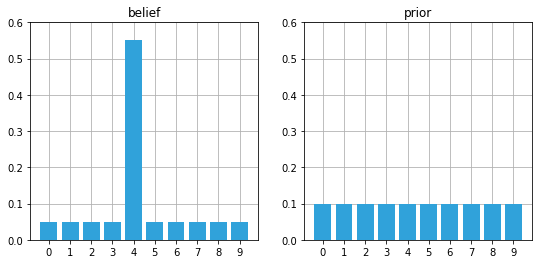

In [42]:
# prior = predict(belief, offset=3, kernel=[.05, .05, .6, .2, .1])
prior = belief
for i in range(100):
    prior = predict(prior, offset=1, kernel=[.05, .05, .6, .2, .1])
book_plots.plot_belief_vs_prior(belief, prior, ylim=(0,0.6))

[3. 3. 1. 1. 1. 1. 1. 1. 3. 1.]
[0.188 0.188 0.062 0.062 0.062 0.062 0.062 0.062 0.188 0.062]


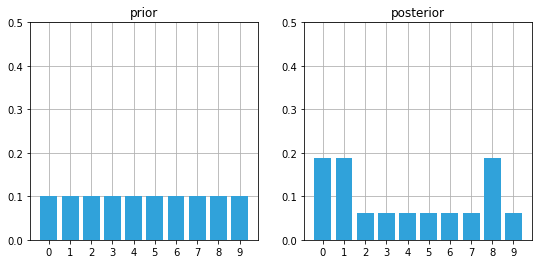

In [44]:
from filterpy.discrete_bayes import update

def lh_hallway(hall, z, z_prob):
    """ compute likelihood that a measurement matches
    positions in the hallway."""

    try:
        scale = z_prob / (1. - z_prob)
    except ZeroDivisionError:
        scale = 1e8

    likelihood = np.ones(len(hall))
    likelihood[hall==z] *= scale
    return likelihood

def updatee(likelihood, prior):
    return (likelihood * prior)/sum(likelihood*prior)

hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
prior = np.array([.1] * 10)
likelihood = lh_hallway(hallway, z=1, z_prob=.75)
print(likelihood)
posterior = update(likelihood, prior)
post = updatee(likelihood, prior)
print(post)
book_plots.plot_prior_vs_posterior(prior, post, ylim=(0,.5))